<a href="https://colab.research.google.com/github/BreakoutMentors/Data-Science-and-Machine-Learning/blob/main/basics/Basics_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook helper code
Useful python packages and functions for this tutorial.  Don't bother understanding the code in this section, as it is not the point of this tutorial. Just run the code by pressing the play button. Doing so will set our environment up with some useful packages and functions.

In [ ]:
import IPython.display as ipd

def display_series(series):
    ipd.display(series)

def display_df(df):
    ipd.display(ipd.HTML(df.to_html()))

# Pandas Tutorial: Data management in Python
Pandas (pronounced like the bear) is a popular Python package for data science, and with good reason: it offers powerful, expressive and flexible data structures that make data manipulation and analysis easy, among many other things. 

This tutorial covers the most common data structures in Pandas, the `Series` and `DataFrame`, from basic manipulations to advanced operations, by showing practical examples. The goal of this notebook is to introduce you to the Pandas package and enable you to use it in your projects.

To get started, we import NumPy and Pandas into our environment:

In [ ]:
import numpy as np
import pandas as pd

## Data Structures
The core data structures in Pandas are the:

| Data Structure 	| Description                                                                                                                                                                                                               	|
|----------------	|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| `Series`       	| 1-dimensional labeled array (list) capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.                         	|
| `DataFrame`    	| 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used Pandas object. 	|



### Series
The basic method to create a Series is to call:

In [ ]:
data = [0, 1, 2, 3, 4, 4, 12]
s = pd.Series(data)
display_series(s)

0     0
1     1
2     2
3     3
4     4
5     4
6    12
dtype: int64

In this example, `data` is a regular list. But, the `Series` data structure can handle many different input data structures. The valid input structures for `data` include:
- a Python dict
- an ndarray (a NumPy array)
- a scalar value (like 5).

Looking at the output of `display_series(s)`, you might be wondering why there seem to be two columns in our 1-dimension series. Here's the explanation: 
- The left column represents the index for the series. Most of the time this will be a numerical value. 
- The right column represents the data stored at each index.   

Indexes make it easier to process and retrieve data efficiently.

You also might be wondering what `dtype: int64` means. Like a NumPy array, a Pandas Series has a `dtype` which explains the type of data stored in the series (e.g., integers, floats, strings, objects, etc.).


One of the big advantages of Series objects is how efficient and easy it is to perform operations on them. For example, here is how to find the mean of our series:

In [ ]:
# Mean of our series 
mean_series = s.mean()
print(f"The mean of our series is {mean_series:.2f}.")

The mean of our series is 3.71.


We can also slice our series using the index, like so: 

In [ ]:
# Get only the first 2 values in our series
sliced_series = s[:2]
display_series(sliced_series)

0    0
1    1
dtype: int64

> *Note:* When the index is a numeric value, like in this example, slicing is the same as slicing a regular Python list. 

Different from normal list slicing, it's very easy to slice by a condition. For example, here is how to return the data points in our series that have a value greater than the median value of the series: 

In [ ]:
print(f"The median of our series is {s.median():.2f}.")

# Get only the values greater than the median in our series
sliced_series = s[ s > s.median() ]
display_series(sliced_series)

The median of our series is 3.00.


4     4
5     4
6    12
dtype: int64

If slicing and efficient operations weren't enough to sell you on the Pandas `Series` data structure, it's also possible to set values, just like you would with normal Python lists. However, there are a number of cool value setting tricks that a Pandas Series can do that can be done by a Python list. For example, we can increase every value in the series by 2 like this: 

In [ ]:
print('Original series: ')
display_series(s)
print('\nAdd 2 to every value in our series: ')
add2_series = s + 2
display_series(add2_series)

Original series: 


0     0
1     1
2     2
3     3
4     4
5     4
6    12
dtype: int64


Add 2 to every value in our series: 


0     2
1     3
2     4
3     5
4     6
5     6
6    14
dtype: int64

For comparison, here is the code needed to do the same operation on a normal Python list:   

In [ ]:
print(f'Original list: {data}')

add2_list = []
for num in data:
    add2_list.append( num + 2 )
print(f'\nAdd 2 to every value in our list: {add2_list}')

Original list: [0, 1, 2, 3, 4, 4, 12]

Add 2 to every value in our list: [2, 3, 4, 5, 6, 6, 14]


### DataFrame?
A `DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet (e.g., Google Sheets or Microsoft Excel) or SQL table, or a dict of Series objects. It is generally the most commonly used Pandas object. Like Series, DataFrame accepts many different kinds of input:
- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame.

Let's assume we want to make a DataFrame containing our two series objects, `s` (the original) and `add2_series` (added 2 to every value in the original). The basic method to create a DataFrame would be to call: 

In [ ]:
data_dict = {
    "original": s,
    "add2": add2_series,
}
df = pd.DataFrame(data_dict)
display_df(df)

,original,add2
0,0,2
1,1,3
2,2,4
3,3,5
4,4,6
5,4,6
6,12,14


As you might have suspected, the DataFrame data structure comes with all the awesome tricks of the Series, but adds even more great things on top. It's the most convenient data structure to handle manipulating tabular data (i.e., data you'd see in a spreadsheet). I'd go so far to say that the Pandas DataFrame is one of the main reasons Python is the preferred coding language for industry data scientists.  

Back to our example, we can see that we have an index (left-most column) and two named columns ("original" and "add2"). We can access the index and columns by calling:

In [ ]:
# Access the index
df.index

RangeIndex(start=0, stop=7, step=1)

In [ ]:
# Access the columns
df.columns

Index(['original', 'add2'], dtype='object')

It's also possible to add a column after creating the DataFrame. Let's add a column called "times2" with the original data (`s`) multiplied by 2:

In [ ]:
df['times2'] = s * 2
display_df(df)

,original,add2,times2
0,0,2,0
1,1,3,2
2,2,4,4
3,3,5,6
4,4,6,8
5,4,6,8
6,12,14,24


As we can see, the times2 column contains the original data multiplied by 2. 

You can treat a DataFrame like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

Here's a basic example of getting / selecting data from specific columns:

In [ ]:
df[['original', 'times2']]

,original,times2
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8
5,4,8
6,12,24


Or accessing specific values: 

In [ ]:
df.loc[df['add2'] > df['original'].median(), :]

,original,add2,times2
2,2,4,4
3,3,5,6
4,4,6,8
5,4,6,8
6,12,14,24


Here we selected the rows that have an "add2" value greater than the median of the "original" column. 

In summary the basics of getting / indexing a DataFrame are as follow:

| Operation                                          	| Syntax                         	| Returns   	|
|----------------------------------------------------	|--------------------------------	|-----------	|
| Select column                                      	| df[col]                        	| Series    	|
| Select row by label                                	| df.loc[label]                  	| Series    	|
| Select row by integer location                     	| df.iloc[loc]                   	| Series    	|
| Select rows by a condition and a subset of columns 	| df.loc[ condition, [columns] ] 	| DataFrame 	|
| Slice rows                                         	| df[5:10]                       	| DataFrame 	|
| Select rows by boolean vector                      	| df[bool_vec]                   	| DataFrame 	|

### Other useful DataFrame operations

In addition to the above, we've included several common operations for the Pandas DataFrame data structure. They include loading external datasets into a Pandas DataFrame, different ways to view our data, and convenient DataFrame operations to know about (including plotting). 

In [ ]:
# Loading an external dataset into a DataFrame
data_url = 'https://raw.githubusercontent.com/krmiddlebrook/intro_to_deep_learning/master/datasets/world-happiness/2019.csv'
df = pd.read_csv(data_url)

# Use .head() to get the first 5 rows
df.head(n=5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
# View the shape of a DataFrame
df.shape

(156, 9)

In [ ]:
# Selecting specific rows
df.loc[0:5, :]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


In [ ]:
# Count the number of unique values in a row
df.loc[:, 'Country or region'].nunique()

156

In [ ]:
# counting the number of rows corresponding to each unique value in a column
df.loc[:, 'Score'].value_counts()

5.208    2
5.467    1
7.139    1
4.944    1
4.350    1
        ..
6.028    1
5.274    1
6.825    1
6.300    1
6.375    1
Name: Score, Length: 155, dtype: int64

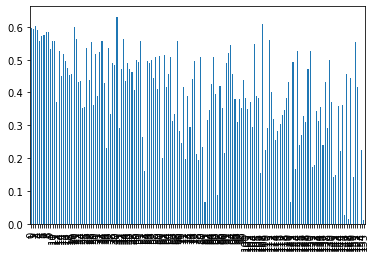

In [ ]:
# ploting the distribution of values in a column
df.loc[:, 'Freedom to make life choices'].plot(kind='bar')

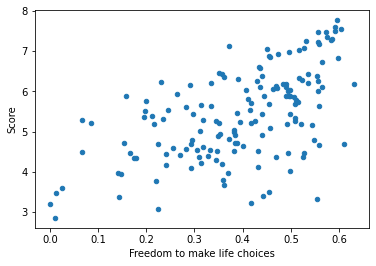

In [ ]:
# ploting the distribution of values in a two columns
df.loc[:, ['Score', 'Freedom to make life choices']].plot(kind='scatter', x='Freedom to make life choices', y='Score')

In [ ]:
# combining two DataFrames
combined = pd.concat((df, df), axis=1) # column-wise concatenation
print('column-wise concatenation', combined.shape)

combined = pd.concat((df, df), axis=0) # row-wise cocatenation
print('row-wise concatenation', combined.shape)

column-wise concatenation (156, 20)
row-wise concatenation (312, 10)


In [ ]:
# Create a new DataFrame column with a default value of "I'm new"
df['new_col'] = "I'm new"
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,new_col
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,I'm new
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,I'm new
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,I'm new
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,I'm new
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,I'm new


In [ ]:
# Joining / merging two DataFrames
joined = df.merge(combined, how='inner', on='Country or region')
print(joined.shape)
joined.head()

(312, 19)


,Overall rank_x,Country or region,Score_x,GDP per capita_x,Social support_x,Healthy life expectancy_x,Freedom to make life choices_x,Generosity_x,Perceptions of corruption_x,new_col_x,Overall rank_y,Score_y,GDP per capita_y,Social support_y,Healthy life expectancy_y,Freedom to make life choices_y,Generosity_y,Perceptions of corruption_y,new_col_y
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,I'm new,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,I'm new
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,I'm new,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,I'm new
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,I'm new,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,I'm new
3,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,I'm new,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,I'm new
4,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,I'm new,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,I'm new


As you probably gathered, Pandas is a very popular library for data processing in Python. It's popular `Series` and `DataFrame` data structures enable us to process millions of rows of data efficiently and without causing a headache. 

To learn more about Pandas checkout their [docs](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html) and [user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#vectorized-operations-and-label-alignment-with-series)!